### Converting pairwise constraints to labeled samples

Clustering is an unsupervised data analysis technique, in which a dataset is partitioned into a set of clusters, which each consist of a dense region of samples. Unlike classification, what constitutes a good clustering is ambiguous. Semi-supervised or constrained clustering introduces information to this problem, in the form of pairwise constraints. This allows clusterings to be found which better represent the goals of the user.

A constraint is a relationship between a pair of samples. Must-link constraints indicate the two samples are in the same cluster, and cannot-link constraints indicate that they are in different clusters. It is a challenge to find clusterings that follow the natural structure of the dataset, while adhering to constraints. This is partly due to the difficulty of working with pairwise constraints as opposed to labels. Pairwise constraints do have their advantages, however. It is very simple for a human oracle to determine if a pair of samples are in the same or different classes. If there are a large number of classes, or if classes do not have obvious labels (image segmentation), then it is difficult to provide a label.

In this work, we turn a set of pairwise constraints into a set of labeled samples, which can be used to train a classifier. Thus, the very difficult task of constrained clustering is simplified to a classification problem. As a classification problem, new samples can be added to resulting grouping in an online manner. Classifiers are much more efficient than constrained clustering techniques. Active learning and outlier detection are also better suited to the classification domain.

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds

from robustclust import get_constraints, \
                        E2CP, \
                        SpectralLearning, \
                        plot_constraints

First, we make some synthetic data, consistently of 2-dimensions Gaussian blobs. We also generate a random set of constraints.

In [2]:
n_clusters, N, n_constraints = (3, 1000, 30)

data, labels = ds.make_blobs(n_samples=N,
                             n_features=2,
                             centers=n_clusters)

constraint_mat, _ = get_constraints(data, labels, n_constraints=n_constraints)

We can plot the data and the constraints. Must-links (ML) are indicated by solid lines, while cannot-links (CL) are represented by dashed lines.

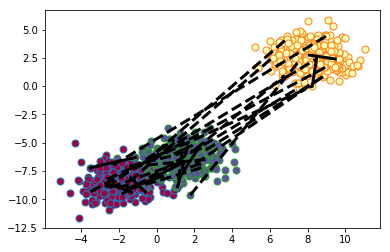

In [3]:
plot_constraints(data, labels=labels, constraint_mat=constraint_mat)

Now we create a ConstraintsToLabels object, which accepts the data and constraint sets, which are the two forms of information available in a constrained clustering problem. A call to the fit_constrained() method  converts the pairwise constraints into a set of labeled data. The samples which are labeled are those which are involved in a constraint. 

The method uses unsupervised hierarchical clustering to agglomerate the constrained samples into groups which do not violate any cannot-link constraints. The groups I will refer to as nodes. Between the nodes, there are both ML and CL constraints. In the plot below I draw the nodes, overlying the groups of samples they represent, with the population of the group shown in the node. The net constraint values between the nodes (#ML - #CL) are represented by lines of different thickness.

/home/evan/robust-clust/robustclust/constrained.py:114: RuntimeWarning: divide by zero encountered in true_divide
  W[ind1, ind2] = self.aff_mat[ind1, ind2] / (np.sqrt(self.aff_mat[ind1, ind1]) * np.sqrt(self.aff_mat[ind2, ind2]))
/home/evan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/evan/robust-clust/robustclust/constrained.py:135: RuntimeWarning: invalid value encountered in greater_equal
  ml_ind = Fbar >= 0
/home/evan/robust-clust/robustclust/constrained.py:137: RuntimeWarning: invalid value encountered in less
  cl_ind = Fbar < 0
/home/evan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/evan/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacia

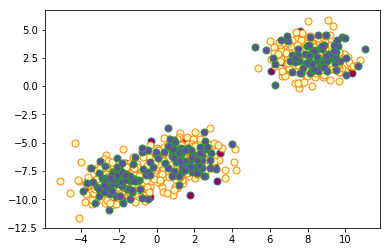

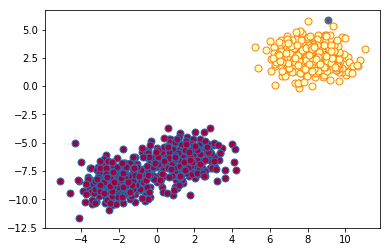

In [4]:
cc1 = E2CP(n_clusters=n_clusters, constraint_mat=constraint_mat)
cc1.fit_constrained(data)

plot_constraints(data, labels=cc1.labels)

cc2 = SpectralLearning(n_clusters=n_clusters, constraint_mat=constraint_mat)
cc2.fit_constrained(data)

plot_constraints(data, labels=cc2.labels)

This is a special graph cut problem. A good solution joins nodes with a high #ML - #CL value between them. The result of this process is a set of labels (trainLabels) for the set of constrained samples (trainInd).

We plot the very simple classification problem below, which was derived from a complicated mess of pairwise constraints. Note that the number of clusters was not known by the method.

In [5]:
plt.figure()
cc.plot_labels(data)
cc.plot_labels(data[trainInd,:], trainLabels)
plt.show()

NameError: name 'cc' is not defined